In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#model
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims
from scipy import signal 

In [3]:
imgCv2 = cv2.imread("parrot.jpg")
img = cv2.resize(imgCv2, (224, 224))#

In [4]:
#3.1 VGG16 Model Parameter
model = VGG16() #load Model

In [5]:
#3.1 VGG16 Model Parameter
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
#3.1 VGG16 Model Parameter
kernels, biases = model.layers[1].get_weights()
model.layers[1].get_config()

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [7]:
#3.1 VGG16 Model Parameter
# convert the image to an array
x = img_to_array(img)

# expand dimensions so that it represents a single 'sample’
#  # reshape 3D(H,W,Ch) image to 4D image (sample=1,H,W,Ch)
x = expand_dims(x, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
x = preprocess_input(x)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'ori')

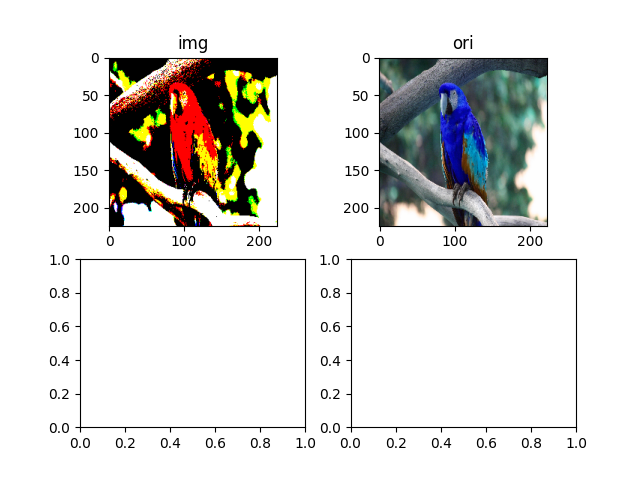

In [8]:
#img1 = imgA[:, :, :, 0]
x.shape
imgX = cv2.merge([x[0,:,:,0], x[0,:,:,1], x[0,:,:,2]])
fig, axs = plt.subplots(2, 2) #row colum
axs[0, 0].imshow(imgX)
axs[0, 0].set_title("img")

axs[0, 1].imshow(img)
axs[0, 1].set_title("ori")

In [9]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 198ms/step


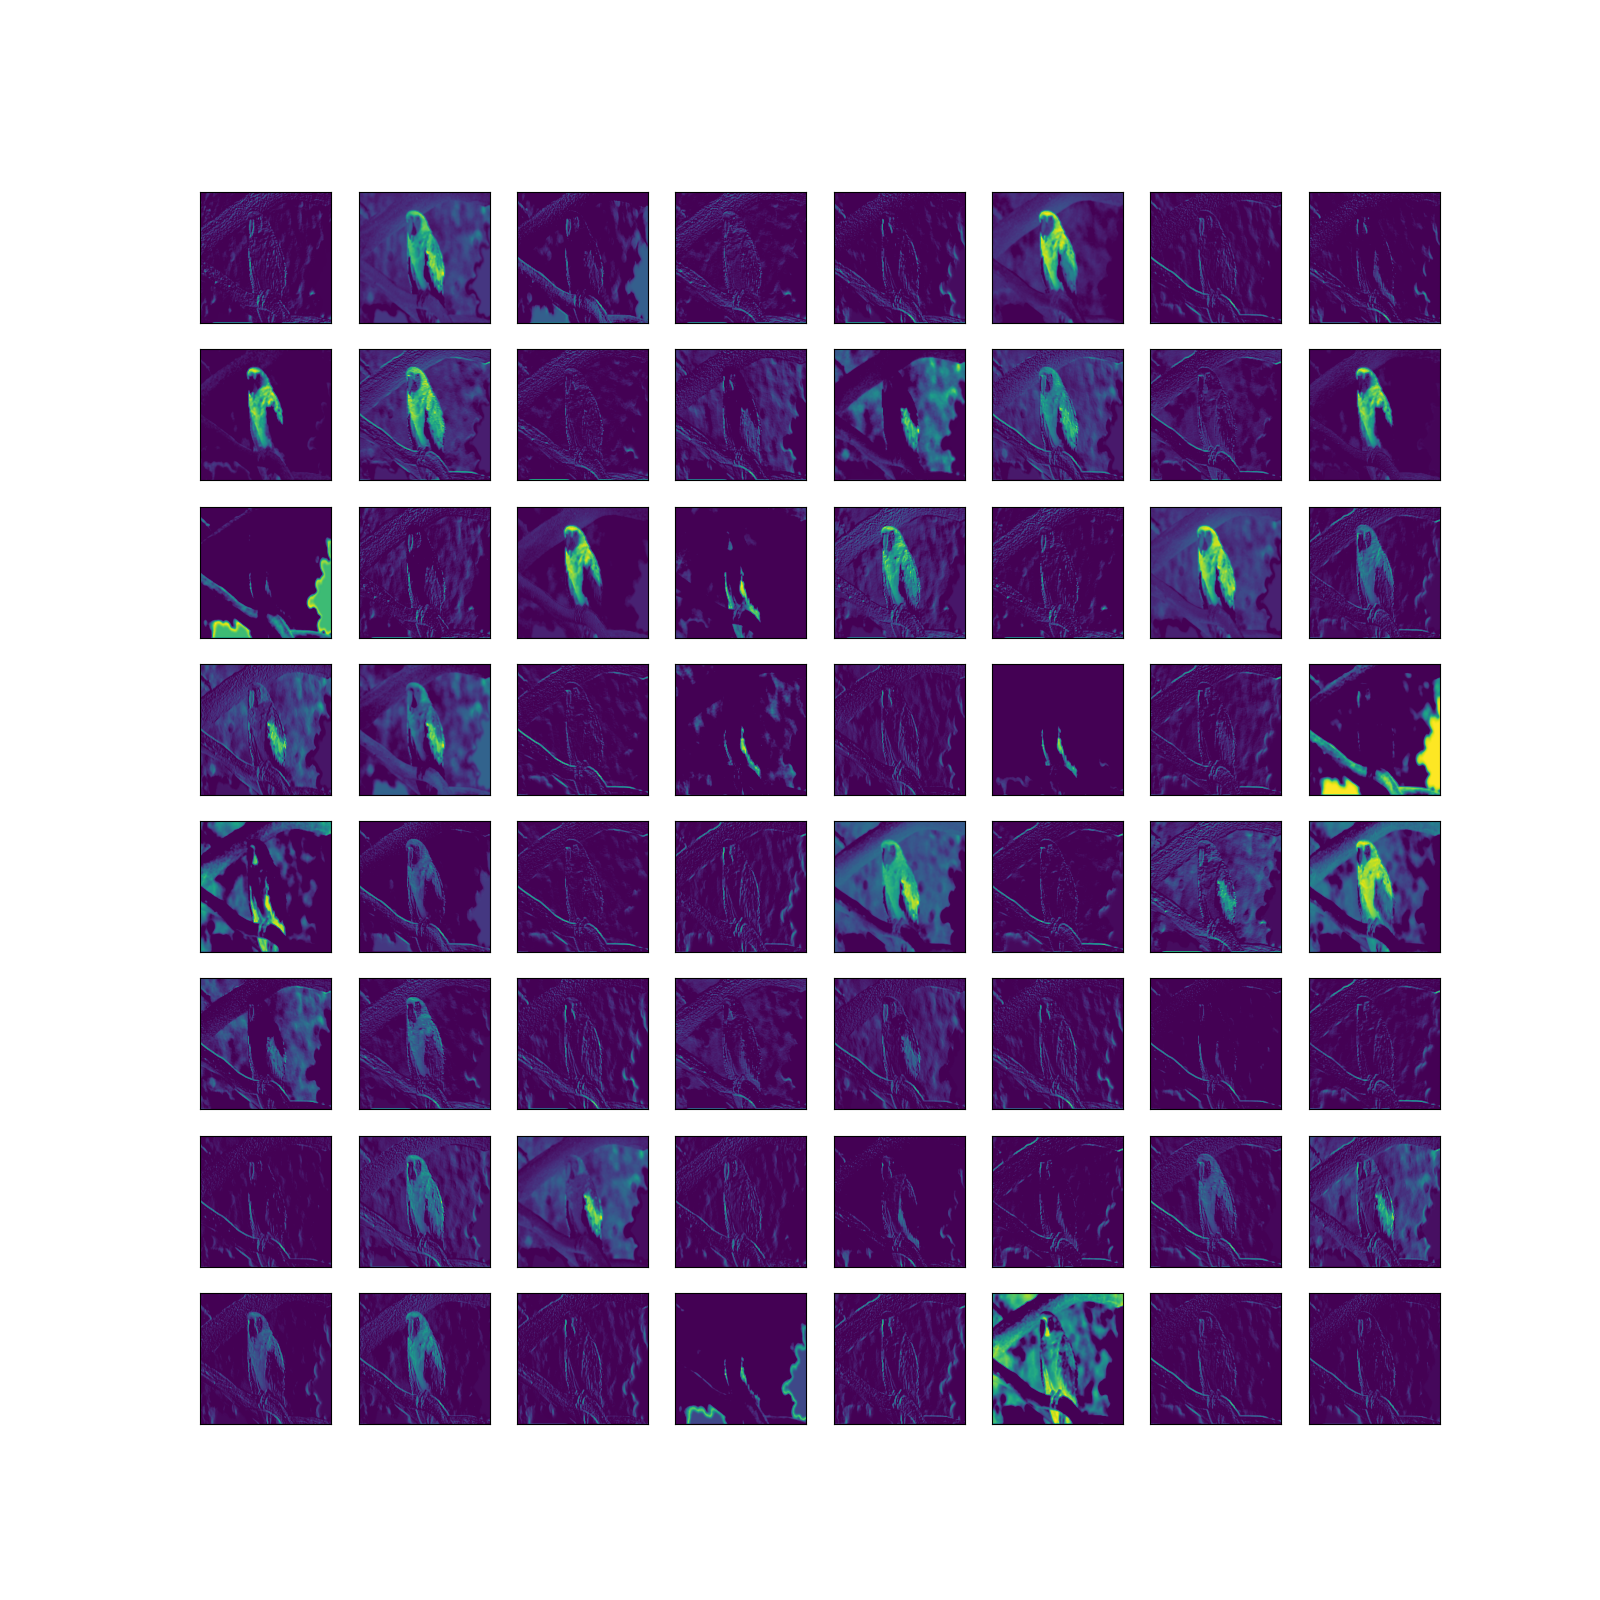

In [10]:

# get feature map for first hidden layer
feature_maps = model.predict(x)
feature_maps.shape
# plot all 64 maps in an 8x8 squares
f = plt.figure(figsize=(16,16))
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure
plt.show()

In [12]:
img_mean = [123.68, 116.779, 103.939] #BGR

In [13]:
imagB = img[...,0]
imagG = img[...,1]
imagR = img[...,2]
b = imagR-img_mean[0]
g = imagG-img_mean[1]
r = imagB-img_mean[2]
img_rgb = cv2.merge([b, g, r])

In [14]:
img2d4 = img_to_array(img_rgb)
img2d4 = expand_dims(img2d4, axis=0)
img2d4.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'BGR')

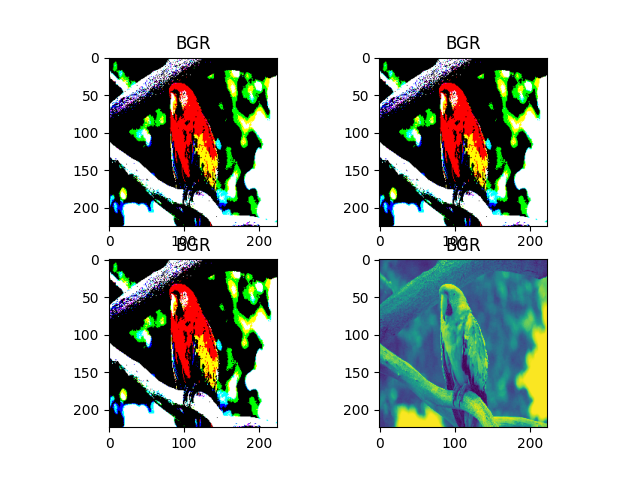

In [15]:
# img2_reshape[..., 0] -= img_mean[0]
# img2_reshape[..., 1] -= img_mean[1]
# img2_reshape[..., 2] -= img_mean[2]
fig, axs = plt.subplots(2, 2) #row colum
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("BGR")

axs[0, 1].imshow(img_rgb)
axs[0, 1].set_title("BGR")

axs[1, 0].imshow(img_rgb)
axs[1, 0].set_title("BGR")

axs[1, 1].imshow(b)
axs[1, 1].set_title("BGR")

In [16]:
img_result = np.zeros((224, 224,3))
#image_sum = np.zeros((224, 224))
for i in range(65):
    image_sum = np.zeros((i,224, 224))

In [ ]:
len(image_sum)

64

In [17]:
def relu(x):
    return(np.maximum(0, x))

In [18]:
for i in range(64):
    img_result[: , :, 0] = signal.convolve2d( img_rgb[ : , : , 0], kernels[: , : , 0, i] , mode='same',boundary='fill', fillvalue=0)
    img_result[: , :, 1] = signal.convolve2d( img_rgb[ : , : , 1], kernels[: , : , 1, i] , mode='same',boundary='fill', fillvalue=0)
    img_result[: , :, 2] = signal.convolve2d( img_rgb[ : , : , 2], kernels[: , : , 2, i] , mode='same',boundary='fill', fillvalue=0)
    image_sum[i,:,:] = img_result[: , :, 0] + img_result[: , :, 1] + img_result[: , :, 2]
    image_sum[i,:,:] = relu(image_sum[i,:,:])
    
#image_sum = img_result[: , :, 0] + img_result[: , :, 1] + img_result[: , :, 2]
imgRGB_sum = cv2.merge([img_result[: , :, 0], img_result[: , :, 1], img_result[: , :, 2]])

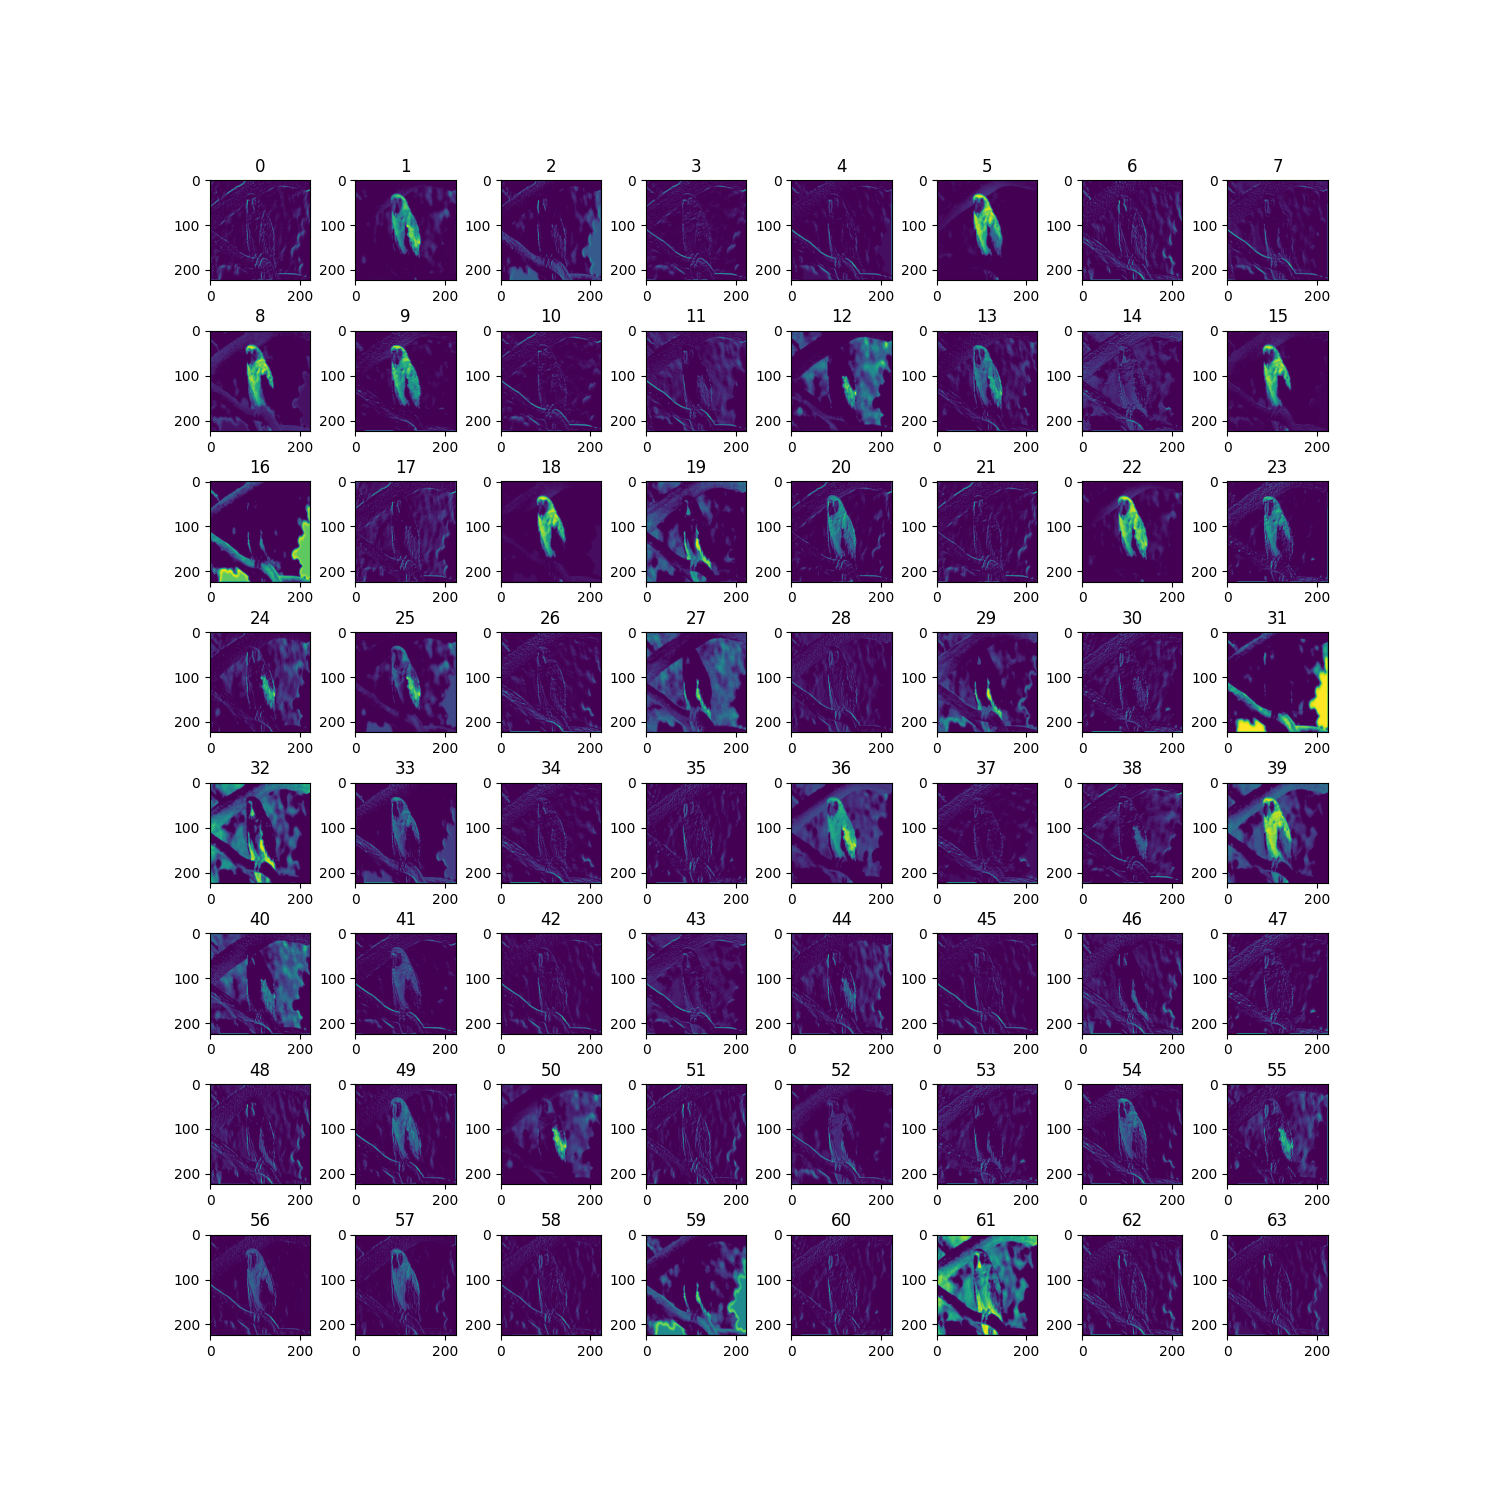

In [19]:
fig, axs = plt.subplots(8,8, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(64):

    axs[i].imshow(image_sum[i,:,:],cmap='viridis')
    axs[i].set_title(i)